Kaggle link 

https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets

About Dataset

**Sales Prediction for Big Mart Outlets**

> Indented blockThe data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.







Importing required libraies

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing Train DataSet

In [92]:
df_train= pd.read_csv("/content/Train _sales.csv")

In [93]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
df_train.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

Checking the outlayers in the data by using the Boxplot

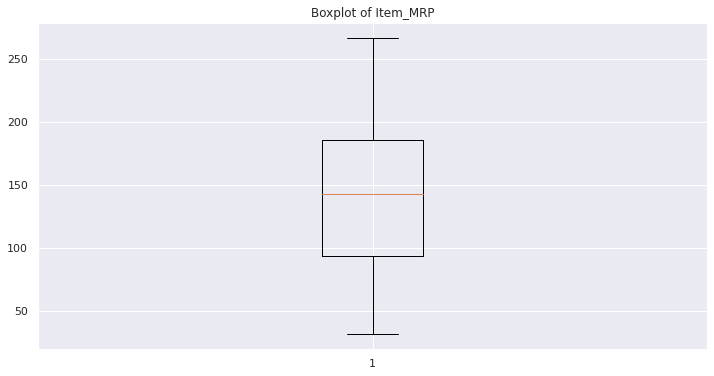

In [95]:
plt.boxplot(df_train['Item_MRP'])
plt.title('Boxplot of Item_MRP')
plt.show()

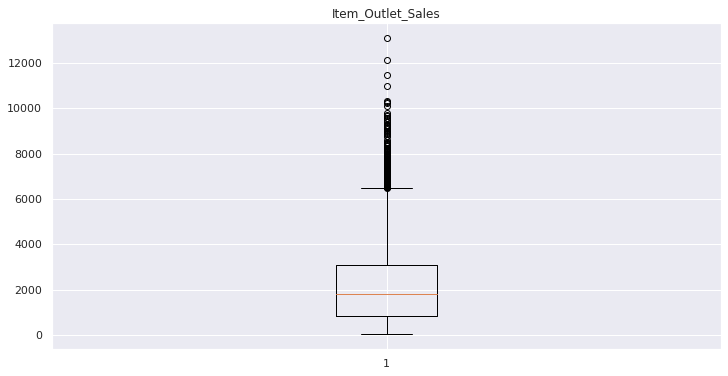

In [96]:
plt.boxplot(df_train['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')
plt.show()

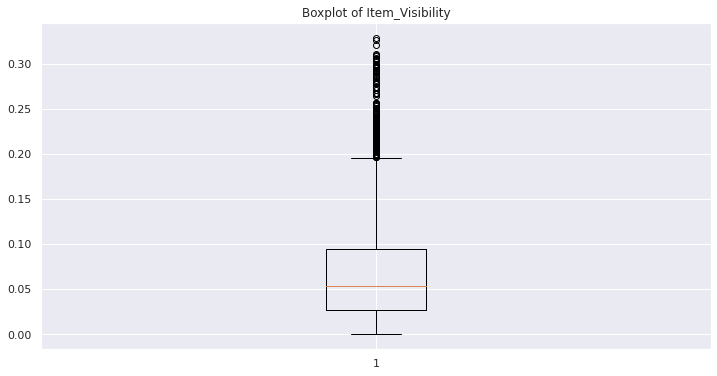

In [97]:
plt.boxplot(df_train['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.show()

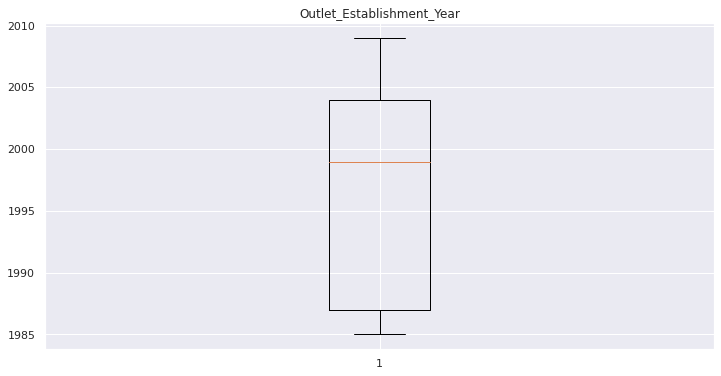

In [98]:
plt.boxplot(df_train['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year')
plt.show()

# Exploratory Data Analysis

In [99]:
df_train.shape

(8523, 12)

In [100]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [102]:
df_train.dtypes #dtypes is to know what type of data it is

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [103]:
df_train['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [104]:
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [105]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [106]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [107]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].median(),inplace=True)

In [108]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [109]:
df_train['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [110]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [111]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [112]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [113]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

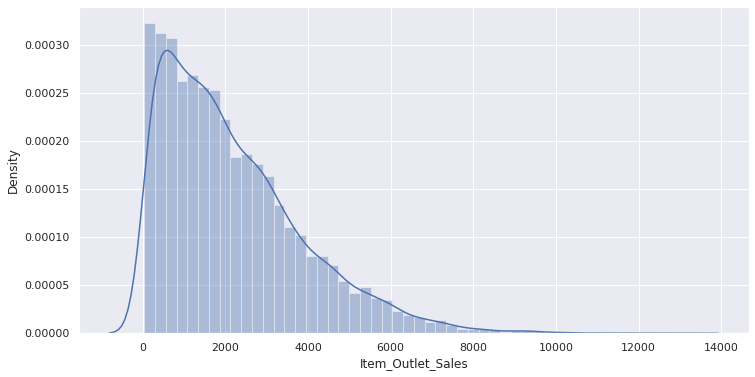



skewness: 1.177531
kurtosis: 1.615877


In [114]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
sns.distplot(df_train.Item_Outlet_Sales)
plt.show()
print('\n')
print("skewness: %f" % df_train ["Item_Outlet_Sales" ].skew())
print("kurtosis: %f" % df_train ["Item_Outlet_Sales" ].kurt())

In [115]:
#descriptuve statistics summary of target variable
df_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

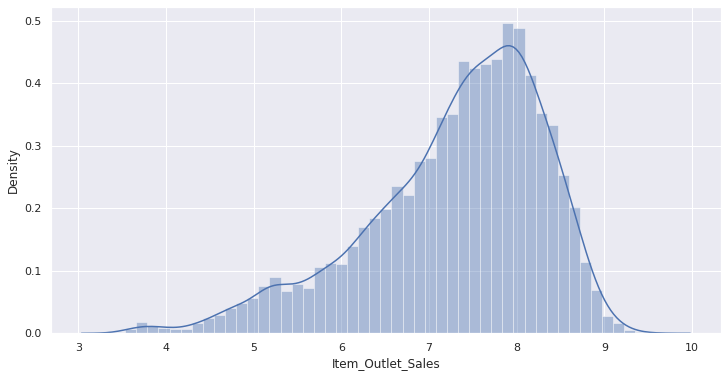

skewness: -0.882266
kurtosis: 0.532920


In [116]:
#log transformation used to transform skwed data to approximately conform to normality

#log transform the target
df_train["Item_Outlet_Sales"] =np.log1p(df_train["Item_Outlet_Sales"])

#kernel Density plot
sns.distplot(df_train.Item_Outlet_Sales);
plt.show()

print("skewness: %f" % df_train["Item_Outlet_Sales"].skew())
print("kurtosis: %f" % df_train["Item_Outlet_Sales"].kurt())


In [117]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [118]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

<AxesSubplot:xlabel='Outlet_Size'>

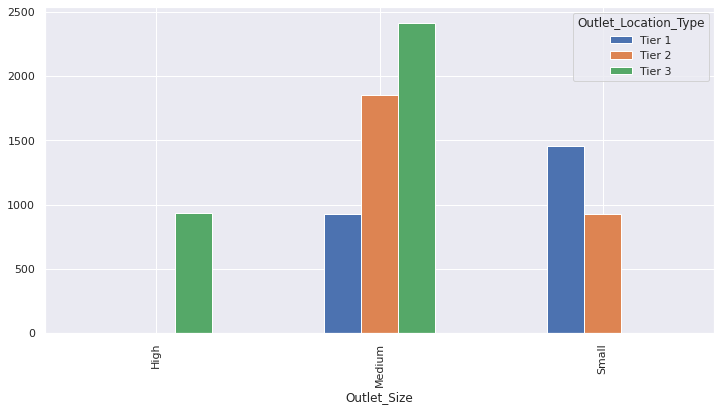

In [119]:
df_train.groupby(['Outlet_Size','Outlet_Location_Type']).size().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Outlet_Type'>

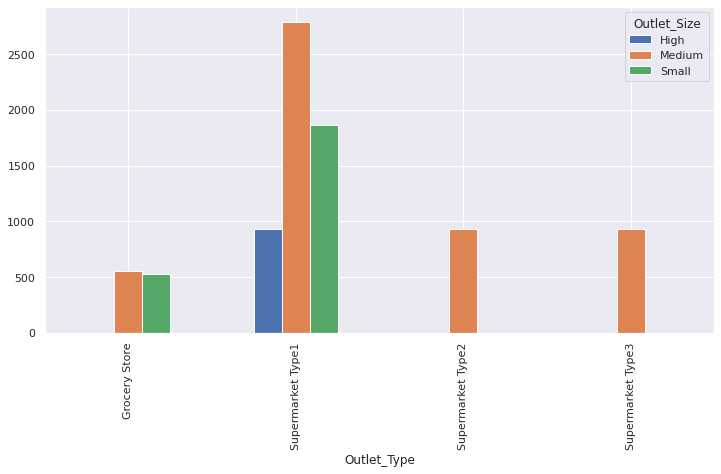

In [120]:
df_train.groupby('Outlet_Type')['Outlet_Size'].value_counts().unstack().plot(kind ='bar')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

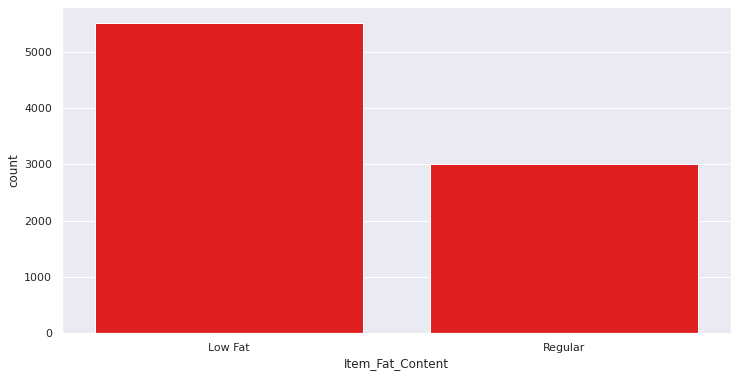

In [121]:
sns.countplot(x='Item_Fat_Content', data=df_train, color='red')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

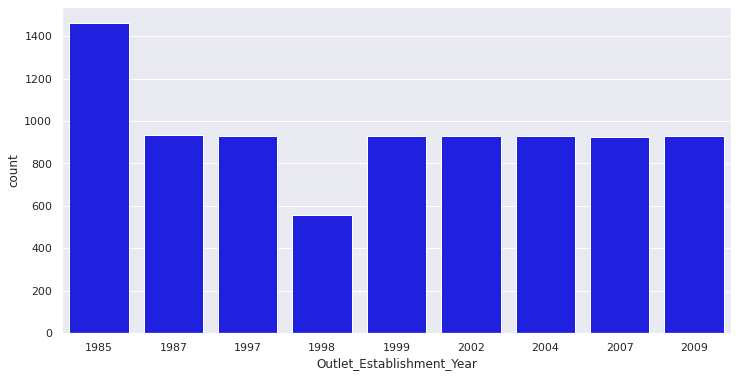

In [122]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Outlet_Establishment_Year', data=df_train, color='blue')

### Checking correlation and visualizing it

In [123]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.813420,4.227240,4.555000,9.310000,12.600000,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,7.297863,1.015211,3.534854,6.727728,7.492945,8.039898,9.479448


In [124]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009716
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.192996
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.509886
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.009716,-0.192996,0.509886,0.077032,1.000000


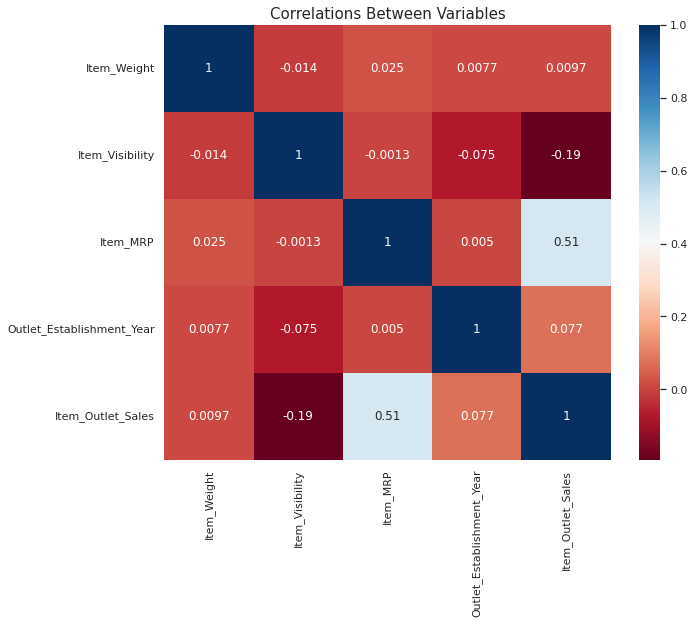

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [126]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [127]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,6.597664
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,6.903451
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,7.929984
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,6.310436
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,7.085159
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,7.521100


In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [129]:
num=df_train._get_numeric_data() 
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,8.225808
1,5.92,0.019278,48.2692,2009,6.096776
2,17.50,0.016760,141.6180,1999,7.648868
3,19.20,0.000000,182.0950,1998,6.597664
4,8.93,0.000000,53.8614,1987,6.903451


In [130]:
cat=df_train.drop(num,axis=1)
cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [131]:
df_dummies =pd.get_dummies(cat)
df_dummies


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [132]:
final_data=num.join(df_dummies)
final_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,8.225808,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,6.096776,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,7.648868,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,6.597664,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,6.903451,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Splitting Data into Train and Test

In [133]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [134]:
x = final_data.drop('Item_Outlet_Sales', axis = 1)


In [135]:
y=final_data.drop(x,axis=1)
y

,Item_Outlet_Sales
0,8.225808
1,6.096776
2,7.648868
3,6.597664
4,6.903451
...,...
8518,7.929984
8519,6.310436
8520,7.085159
8521,7.521100


StandaradScaler

In [136]:
##StandaradScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(x)
##Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model Building

In [137]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
y_pred = lasso_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
r2 =r2_score(y_test,y_pred)
print("R-squared:",r2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)


MSE:  0.34080215830585897
R-squared: 0.6767814670549899
Root Mean Squared Error: 0.5837826293286389
Mean Absolute Error: 0.4595298908192891


GridSearchCV to find optimal hyperparameter

In [138]:
##GridSearchCV to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(x_train, y_train)
print("Best alpha parameter: ", lasso_cv.best_params_)

Best alpha parameter:  {'alpha': 0.01}


In [139]:
lasso_reg = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.01)

In [140]:
r2 =r2_score(y_test,y_pred)
print("R-squared:",r2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

R-squared: 0.6767814670549899
Root Mean Squared Error: 0.5837826293286389
Mean Absolute Error: 0.4595298908192891


XGBOOST

In [141]:
##XGBOOST
from xgboost import XGBRegressor
from sklearn import metrics

In [142]:

regressor = XGBRegressor()

In [143]:
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(x_train, y_train)

[14:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [144]:
sales_data_prediction = regressor.predict(x_train)

In [145]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

R Squared value =  0.7617664146605707
Root Mean Squared Error: 0.5837826293286389
Mean Absolute Error: 0.4595298908192891


In [146]:
# prediction on test data
data_prediction = regressor.predict(x_test)

In [147]:
# R squared Value
r2_data = metrics.r2_score(y_test, data_prediction)
print('R Squared value = ', r2_data)

R Squared value =  0.728331688783219


Boosting ensemble technique

In [148]:
##Boosting ensemble technique
from sklearn.ensemble import GradientBoostingRegressor
lasso = Lasso(alpha=0.1)
gbm = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                min_samples_split=2, min_samples_leaf=1, max_depth=3, random_state=42,
                                alpha=0.1, verbose=0, validation_fraction=0.1)

In [149]:
gbm.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.1, loss='ls', random_state=42)

In [150]:
y_pred = gbm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 =r2_score(y_test,y_pred)
print("R-squared:",r2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)


MSE: 0.2869953995240166
R-squared: 0.7278120759057265
Root Mean Squared Error: 0.5357195157206955
Mean Absolute Error: 0.4137006357667489


In [151]:
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso MSE:", mse_lasso)
r2 =r2_score(y_test,y_pred)
print("R-squared:",r2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)


Lasso MSE: 0.34080215830585897
R-squared: 0.7278120759057265
Root Mean Squared Error: 0.5357195157206955
Mean Absolute Error: 0.4137006357667489


## Model Building for TEST Data

In [152]:
df_test= pd.read_csv("/content/Test _sales.csv")

In [153]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [154]:
df_test.shape

(5681, 11)

In [155]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [156]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [157]:
df_test.dtypes #dtypes is to know what type of data it is

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [158]:
df_test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [159]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df_test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [160]:
df_test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [161]:
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [162]:
df_test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [163]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].median(),inplace=True)

In [164]:
df_test.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [165]:
df_test['Item_Weight'].describe()

count    5681.000000
mean       12.662023
std         4.245831
min         4.555000
25%         9.195000
50%        12.500000
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [166]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [167]:
df_test['Outlet_Size'].mode()

0    Medium
dtype: object

In [168]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [169]:
df_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [170]:
num_test=df_test._get_numeric_data() 
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,8.225808
1,5.92,0.019278,48.2692,2009,6.096776
2,17.50,0.016760,141.6180,1999,7.648868
3,19.20,0.000000,182.0950,1998,6.597664
4,8.93,0.000000,53.8614,1987,6.903451


In [171]:
cat_test=df_test.drop(num_test,axis=1)

In [172]:
cat_test.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,Regular,Dairy,Medium,Tier 2,Supermarket Type1
2,Low Fat,Others,Medium,Tier 3,Grocery Store
3,Low Fat,Snack Foods,Medium,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3


In [173]:
dum=pd.get_dummies(cat_test)

In [174]:
dum

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [175]:
final_test=num.join(dum)

In [176]:
final_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,8.225808,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,2009,6.096776,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,17.50,0.016760,141.6180,1999,7.648868,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,19.20,0.000000,182.0950,1998,6.597664,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8.93,0.000000,53.8614,1987,6.903451,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [177]:
##StandaradScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1= scaler.fit_transform(final_test)

In [178]:
test1=pd.DataFrame(X1,columns=final_test.columns)
test1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.831187,-0.970732,1.747454,0.139541,0.914094,0.740811,-0.740811,-0.289033,-0.172954,-0.116445,...,-0.350325,0.798824,-0.623969,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
1,-1.630810,-0.908111,-1.489023,1.334103,-1.183160,-1.349873,1.349873,-0.289033,-0.172954,-0.116445,...,-0.350325,0.798824,-0.623969,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
2,1.108727,-0.956917,0.010040,0.139541,0.345766,0.740811,-0.740811,-0.289033,-0.172954,-0.116445,...,-0.350325,0.798824,-0.623969,-0.623969,-0.696584,1.242623,2.620767,-1.375706,-0.349374,-0.351274
3,1.510904,-1.281758,0.660050,0.020085,-0.689748,0.740811,-0.740811,-0.289033,-0.172954,-0.116445,...,-0.350325,0.798824,-0.623969,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
4,-0.918719,-1.281758,-1.399220,-1.293934,-0.388525,-1.349873,1.349873,-0.289033,-0.172954,-0.116445,...,-0.350325,0.798824,-0.623969,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,-0.349374,2.846782


In [179]:
y_pred = lasso_reg.predict(test1)

ValueError: ignored